<center>

# **DSE302: Data Science and Machine Learning**
# **Final Project**


# **Identification of Exoplanets and Exomoons**

##### <font size="2">By:</font>

#### **Shaunak Padhyegurjar (19213)**
#### **Riya Rai (19234)**
#### **Yuvraj Sharma (19288)**
######  <font size="2"> *Department of Physics, IISER Bhopal* </font>

##### <font size="2">Instructor:</font>

#### Dr. Tanmay Basu
######  <font size="2"> *Assistant Professor, DSE Department, IISER Bhopal* </font>

<br>

<img src="https://dse.iiserb.ac.in/img/IISERB_Logo.png" alt="drawing" width="100"/>
</center>













# Author: Shaunak Padhyegurjar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
np.set_printoptions(threshold=sys.maxsize)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/exoplanet_trn_data.csv")
df

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,Unnamed: 282,Unnamed: 283,Unnamed: 284,Unnamed: 285,Unnamed: 286,Unnamed: 287
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,NaN,NaN,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17965,Kepler-28 b,Kepler-28,b,NaN,NaN,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17966,Kepler-1272 b,Kepler-1272,b,NaN,NaN,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,...,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
17967,HD 102117 b,HD 102117,b,HD 102117,HIP 57291,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,...,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
labels = pd.read_csv('/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/exoplanet_trn_data_targets.csv', header=None, usecols=[1])
labels

,1
0,0.1101
1,0.0932
2,0.0202
3,0.0632
4,0.0149
...,...
17964,0.1995
17965,0.0620
17966,0.0000
17967,0.1532


In [4]:
df.rename(columns = {'Unnamed: 282':'shift1', 'Unnamed: 283':'shift2', 'Unnamed: 284':'shift3', 
                     'Unnamed: 285':'shift4', 'Unnamed: 286':'shift5', 'Unnamed: 287':'shift6'}, inplace = True)
df

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,shift1,shift2,shift3,shift4,shift5,shift6
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,NaN,NaN,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17965,Kepler-28 b,Kepler-28,b,NaN,NaN,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
17966,Kepler-1272 b,Kepler-1272,b,NaN,NaN,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,...,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
17967,HD 102117 b,HD 102117,b,HD 102117,HIP 57291,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,...,3,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
nonzero = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 32.0, 36.0, 45.0, 69.0, 
                    89.0, 40.0, 91.0, 42.0, 47.0, 111.0])

shift1 = np.array(df["shift1"])
shift2 = np.array(df["shift2"])
shift3 = np.array(df["shift3"])
shift4 = np.array(df["shift4"])
shift5 = np.array(df["shift5"])
shift6 = np.array(df["shift6"])

shift_resolved = np.array([])

for i in range(len(shift6)):
    if shift6[i] in nonzero:
        shift_resolved = np.append(shift_resolved, i)
        for j in range(31, 282):
            df.iloc[i, j] = df.iloc[i, j+6]
            
print(shift_resolved)
            
for i in range(len(shift5)):
    if shift5[i] in nonzero:
        if i in shift_resolved:
            continue
        else:
            shift_resolved = np.append(shift_resolved, i)
            for j in range(31, 282):
                df.iloc[i, j] = df.iloc[i, j+5]
                
print(shift_resolved)

for i in range(len(shift4)):
    if shift4[i] in nonzero:
        if i in shift_resolved:
            continue
        else:
            shift_resolved = np.append(shift_resolved, i)
            for j in range(31, 282):
                df.iloc[i, j] = df.iloc[i, j+4]
                
print(shift_resolved)

for i in range(len(shift3)):
    if shift3[i] in nonzero:
        if i in shift_resolved:
            continue
        else:
            shift_resolved = np.append(shift_resolved, i)
            for j in range(31, 282):
                df.iloc[i, j] = df.iloc[i, j+3]
                
print(shift_resolved)

for i in range(len(shift2)):
    if shift2[i] in nonzero:
        if i in shift_resolved:
            continue
        else:
            shift_resolved = np.append(shift_resolved, i)
            for j in range(31, 282):
                df.iloc[i, j] = df.iloc[i, j+2]
                
print(shift_resolved)

for i in range(len(shift1)):
    if shift1[i] in nonzero:
        if i in shift_resolved:
            continue
        else:
            shift_resolved = np.append(shift_resolved, i)
            for j in range(31, 282):
                df.iloc[i, j] = df.iloc[i, j+1]
                
print(shift_resolved)

[  502.  1285.  2251.  4396.  4491.  6076.  6947.  8276. 10210. 11816.
 15255. 16581.]
[  502.  1285.  2251.  4396.  4491.  6076.  6947.  8276. 10210. 11816.
 15255. 16581.]
[  502.  1285.  2251.  4396.  4491.  6076.  6947.  8276. 10210. 11816.
 15255. 16581.  5529.  7410.  7657. 12736. 13715. 16055.]
[  502.  1285.  2251.  4396.  4491.  6076.  6947.  8276. 10210. 11816.
 15255. 16581.  5529.  7410.  7657. 12736. 13715. 16055.   302.   399.
   400.   530.   615.   796.   802.   920.  1776.  1778.  1949.  2353.
  2386.  2401.  2436.  2529.  2682.  2743.  3031.  3303.  3449.  3870.
  4245.  4578.  4650.  4657.  5524.  5869.  5888.  5942.  5961.  6367.
  6820.  6916.  7464.  7494.  7574.  7918.  7952.  8073.  8692.  8810.
  9169.  9207.  9549.  9766.  9891.  9943. 10103. 10336. 10392. 10878.
 10984. 10994. 11058. 11111. 11148. 11747. 11754. 11902. 12005. 12011.
 12394. 12604. 12656. 12664. 13132. 13142. 13181. 13288. 14077. 14187.
 14463. 14831. 15000. 15075. 15199. 15285. 15301. 15498. 1

In [6]:
df.to_csv("/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/cleaned data2.csv", index=None)

In [37]:
df = pd.read_csv("/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/cleaned data2.csv")
df

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,shift1,shift2,shift3,shift4,shift5,shift6
0,AU Mic c,AU Mic,c,HD 197481,HIP 102409,TIC 441420236,Gaia DR2 6794047652729201024,1,1,2,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Kepler-1476 b,Kepler-1476,b,NaN,NaN,TIC 164727404,Gaia DR2 2106597487787652352,0,1,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Kepler-255 d,Kepler-255,d,NaN,NaN,TIC 272083669,Gaia DR2 2080202611655694336,0,1,3,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Kepler-82 e,Kepler-82,e,NaN,NaN,TIC 63372898,Gaia DR2 2125850623586710400,0,1,5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,K2-156 b,K2-156,b,NaN,NaN,TIC 176868262,Gaia DR2 3596250888028092160,1,1,1,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17964,Kepler-245 d,Kepler-245,d,NaN,NaN,TIC 63004906,Gaia DR2 2101768089124657664,0,1,4,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17965,Kepler-28 b,Kepler-28,b,NaN,NaN,TIC 63122956,Gaia DR2 2125731464014361088,1,1,2,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17966,Kepler-1272 b,Kepler-1272,b,NaN,NaN,TIC 399794186,Gaia DR2 2100148611573075200,0,1,1,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
17967,HD 102117 b,HD 102117,b,HD 102117,HIP 57291,TIC 267519701,Gaia DR2 5341673851394297600,0,1,1,...,3.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
labels = pd.read_csv("/Users/shaunakpadhyegurjar/Downloads/Exoplanet data/exoplanet_trn_data_targets.csv", header=None, usecols=[1])
labels

,1
0,0.1101
1,0.0932
2,0.0202
3,0.0632
4,0.0149
...,...
17964,0.1995
17965,0.0620
17966,0.0000
17967,0.1532


In [39]:
period = np.array(df["pl_orbper"])
orbsma = np.array(labels)

In [40]:
np.max(np.unique(period, return_counts=True)[1])

13

In [41]:
per_outliers = np.where((period > (np.mean(period) + 3*np.std(period))) | (period < (np.mean(period) - 3*np.std(period))) | (period == 0)) 
sma_outliers = np.where((orbsma > (np.mean(orbsma) + 3*np.std(orbsma))) | (orbsma < (np.mean(orbsma) - 3*np.std(orbsma))) | (orbsma < 0.01))

per_outliers = np.append(per_outliers, sma_outliers)
period = np.delete(period, per_outliers)
orbsma = np.delete(orbsma, per_outliers)

In [42]:
np.unique(np.isnan(period), return_counts=True)

(array([False,  True]), array([15404,   332]))

In [43]:
period2 = np.delete(period, np.where(np.isnan(period) == True))
orbsma2 = np.delete(orbsma, np.where(np.isnan(period) == True))

In [44]:
print(len(period), len(orbsma))

15736 15736


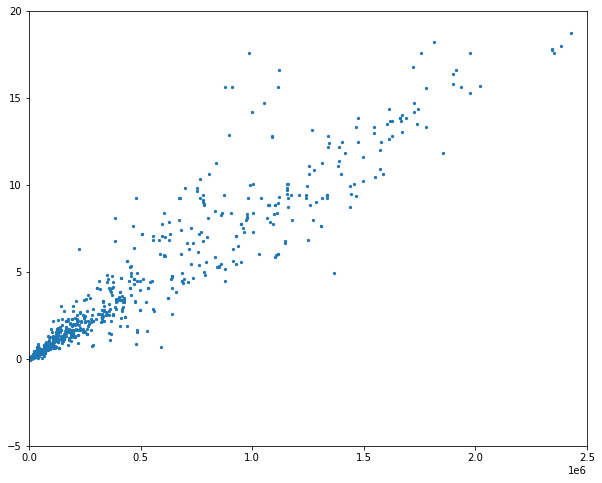

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(period2**2, orbsma2**3, s=5)
plt.xlim(-10, 2500000)
plt.ylim(-5, 20)
plt.show()

In [46]:
def gauss(a, b, n):
    # Forward elimination

    p = np.identity(n)

    for k in range(n-1):
#         print(f"\nIteration {k+1}\n")
        # Pivoting part
        if ~np.isclose(a[k, k], 0.0):
            for i in range(k+1, n):
                if np.fabs(a[i,k]) > np.fabs(a[k,k]):
                    a[[k,i]] = a[[i,k]]
                    b[[k,i]] = b[[i,k]]
                    p[[k,i]] = p[[i,k]]
                    break

        for i in range(k+1,n):
            factor = a[k,k]/a[i,k]

            for j in range(k,n):
                a[i,j] = a[k,j] - a[i,j]*factor

            b[i] = b[k] - b[i]*factor

    # Back Substitution

    x = np.zeros(n)
    x[n-1] = b[n-1] / a[n-1, n-1]

    for l in range(n-2, -1, -1):
        sum = b[l]
        for m in range(l+1, n):
            sum = sum - a[l, m] * x[m]

        x[l] = sum / a[l, l]
    
    return x


def polynomial(xdata, ydata, m, n):
    A = np.zeros((m + 1, m + 1))
    B = np.zeros(m + 1)

    for i in range(m+1):
        for j in range(i+1):
            k = i + j
            sum = 0
            for l in range(n):
                sum = sum + xdata[l] ** k
            A[i, j] = A[j, i] = sum
        sum = 0
        for l in range(n):
            sum = sum + ydata[l] * (xdata[l] ** i)
        B[i] = sum

    coeffs = gauss(A, B, m + 1)

    x = np.linspace(np.min(xdata) - 5, np.max(xdata) + 5, 100)
    y = 0
    for i in range(m + 1):
        y = y + coeffs[i] * (x ** i)

    xmean = np.mean(xdata)
    ymean = np.mean(ydata)

    ypred = 0
    for i in range(m + 1):
        ypred = ypred + coeffs[i] * xdata ** i

    St = np.sum((ydata - ymean) ** 2)
    Sr = np.sum((ydata - ypred) ** 2)

    std_error = np.sqrt(Sr / (n - (m + 1)))
    r2 = (St - Sr) / St
    r = np.sqrt((St - Sr) / St)

#     plt.scatter(xdata, ydata, label="Given data")
#     plt.plot(x, y, color=u'#ff7f0e', label="Fitted line")
#     plt.xlabel("$x$")
#     plt.ylabel("$y$")
#     plt.title("Least Squares Polynomial Regression")
#     plt.legend()
#     plt.grid()
#     plt.show()

    return coeffs, std_error, r2, r

In [47]:
xdata = period2
ydata = orbsma2

coeffs, std_error, r2, r = polynomial(xdata ** 2, ydata**3, 1, len(xdata))

print(coeffs)
    
print("\nStandard error is:\t", std_error)
print("\nValue of r^2 is:\t", r2)
print("\nGoodness of fit (r value) is:\t", r, "\n")
print("-"*90, "\n")

[8.34246648e+01 1.23764907e-07]

Standard error is:	 4566.826749962669

Value of r^2 is:	 0.9950060898081692

Goodness of fit (r value) is:	 0.9974999197033397 

------------------------------------------------------------------------------------------ 



In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
print(mean_squared_error(ydata**3, ypred))

20853198.708219755
